In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [3]:
print(tf.__version__)
print(np.__version__)
print(keras.__version__)

2.17.1
1.26.4
3.5.0


In [4]:
cifar10 = tf.keras.datasets.cifar10

# load the dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


In [5]:
from sklearn.model_selection import train_test_split
train_images,validation_images, train_labels, validation_labels = train_test_split(train_images, train_labels, test_size=0.1, random_state=0)

# Check shape
print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)
print('Validation Images Shape: ', validation_images.shape)
print('Validation Labels Shape: ', validation_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

Train images shape: (45000, 32, 32, 3)
Train labels shape: (45000, 1)
Validation Images Shape:  (5000, 32, 32, 3)
Validation Labels Shape:  (5000, 1)
Test images shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


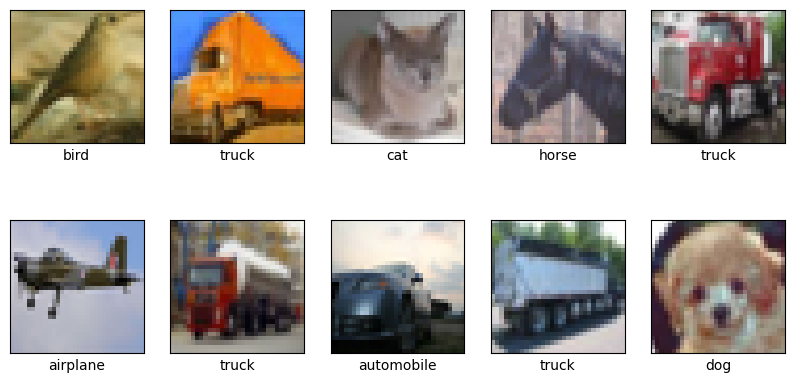

In [6]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [7]:
np.unique(train_labels, axis=0)

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]], dtype=uint8)

In [8]:
train_labels[1][0]

9

In [9]:
# Normalization
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0
validation_images = validation_images.astype('float32') / 255.0

In [10]:
# Print shape
print("Train images shape:", train_images.shape)
print("Validation images shape:", validation_images.shape)
print("Test images shape:", test_images.shape)

Train images shape: (45000, 32, 32, 3)
Validation images shape: (5000, 32, 32, 3)
Test images shape: (10000, 32, 32, 3)


In [11]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels, 10)
validation_labels = to_categorical(validation_labels, 10)
test_labels = to_categorical(test_labels, 10)

In [12]:
# ANN Model 
from tensorflow.keras import models, layers
model = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(1024, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])


# Compile model

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']
             )

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │       3,146,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,837,066 (14.64 MB)

 Trainable params: 3,837,066 (14.64 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
history = model.fit(train_images, train_labels, epochs=20, batch_size=64, 
                    validation_data=(validation_images, validation_labels))

Epoch 1/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 25s 33ms/step - accuracy: 0.2561 - loss: 2.0397 - val_accuracy: 0.3558 - val_loss: 1.7534
Epoch 2/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 22s 32ms/step - accuracy: 0.3712 - loss: 1.7306 - val_accuracy: 0.4102 - val_loss: 1.6304
Epoch 3/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 23s 33ms/step - accuracy: 0.4101 - loss: 1.6362 - val_accuracy: 0.4018 - val_loss: 1.6380
Epoch 4/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 23s 32ms/step - accuracy: 0.4396 - loss: 1.5651 - val_accuracy: 0.4378 - val_loss: 1.5668
Epoch 5/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 23s 32ms/step - accuracy: 0.4555 - loss: 1.5181 - val_accuracy: 0.4476 - val_loss: 1.5414
Epoch 6/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 41s 33ms/step - accuracy: 0.4769 - loss: 1.4718 - val_accuracy: 0.4672 - val_loss: 1.4866
Epoch 7/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 23s 32ms/step - accuracy: 0.4816 - loss: 1.4354 - val_accuracy: 0.4680 - val_loss: 1.4814
Epoch 8/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 24s 34ms/step - accuracy: 0.4988 - loss: 1.4032 - 

In [14]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

313/313 - 2s - 6ms/step - accuracy: 0.5185 - loss: 1.4497
Test Accuracy: 51.85%


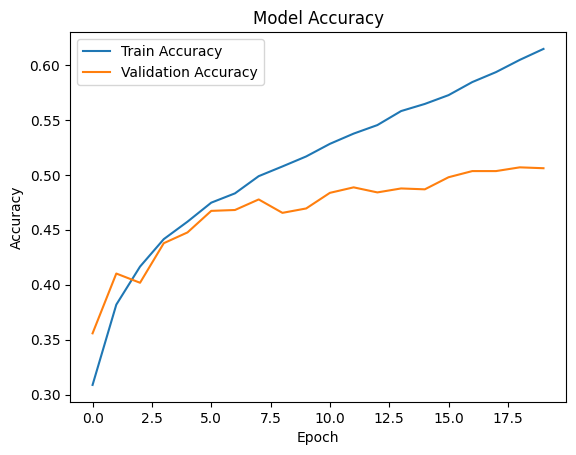

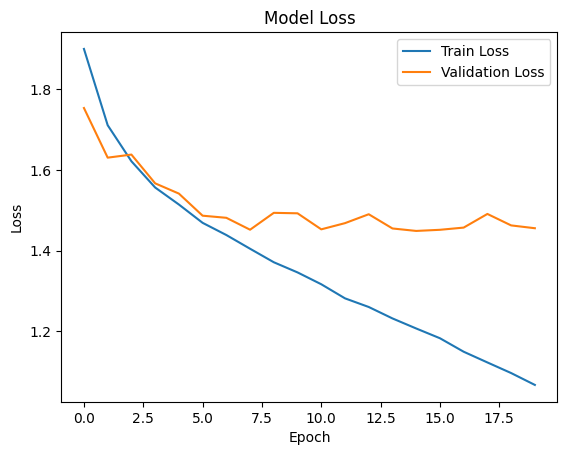

In [15]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

# Plot Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()


# Hyperparameter tuning to improve the model performance

In [16]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images,validation_images, train_labels, validation_labels = train_test_split(train_images, train_labels, test_size=0.1, random_state=0)

# Check shape
print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)
print('Validation Images Shape: ', validation_images.shape)
print('Validation Labels Shape: ', validation_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

Train images shape: (45000, 32, 32, 3)
Train labels shape: (45000, 1)
Validation Images Shape:  (5000, 32, 32, 3)
Validation Labels Shape:  (5000, 1)
Test images shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Standardize images: Mean 0, Std 1
mean = np.mean(train_images, axis=(0,1,2,3))
std = np.std(train_images, axis=(0,1,2,3))
train_images = (train_images - mean) / std
validation_images = (validation_images - mean) / std
test_images = (test_images - mean) / std


from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels, 10)
validation_labels = to_categorical(validation_labels, 10)
test_labels = to_categorical(test_labels, 10)

# Data Augmentation (for training)
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

datagen.fit(train_images)

In [18]:
from tensorflow.keras import models, layers, regularizers
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.callbacks import EarlyStopping


# ANN model
model = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),

    layers.Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(10, activation='softmax')
])


# Compile model with different optimizers (try Adam, RMSprop, SGD)
optimizer = Adam(learning_rate=0.0001)  # Lower learning rate
# optimizer = RMSprop(learning_rate=0.0005)
# optimizer = SGD(learning_rate=0.01, momentum=0.9)

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1024)                │       3,146,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 1024)                │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,812,618 (14.54 MB)

 Trainable params: 3,809,034 (14.53 MB)

 Non-trainable params: 3,584 (14.00 KB)

In [19]:
# Early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train model using augmented data
history = model.fit(datagen.flow(train_images, train_labels, batch_size=128), 
                    epochs=50, 
                    validation_data=(test_images, test_labels), 
                    callbacks=[early_stop])


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


352/352 ━━━━━━━━━━━━━━━━━━━━ 45s 117ms/step - accuracy: 0.2343 - loss: 5.0597 - val_accuracy: 0.4120 - val_loss: 4.1879
Epoch 2/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 41s 116ms/step - accuracy: 0.3169 - loss: 4.5552 - val_accuracy: 0.4465 - val_loss: 3.9878
Epoch 3/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 42s 116ms/step - accuracy: 0.3430 - loss: 4.3355 - val_accuracy: 0.4588 - val_loss: 3.8633
Epoch 4/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 41s 115ms/step - accuracy: 0.3596 - loss: 4.1723 - val_accuracy: 0.4741 - val_loss: 3.7151
Epoch 5/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 41s 115ms/step - accuracy: 0.3789 - loss: 4.0099 - val_accuracy: 0.4862 - val_loss: 3.5815
Epoch 6/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 42s 117ms/step - accuracy: 0.3901 - loss: 3.8586 - val_accuracy: 0.4868 - val_loss: 3.4636
Epoch 7/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 41s 116ms/step - accuracy: 0.4006 - loss: 3.7042 - val_accuracy: 0.4987 - val_loss: 3.3253
Epoch 8/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 41s 115ms/step - accuracy: 0.4110 - loss: 3.5631 - val